In [1]:
import warnings; warnings.simplefilter('ignore')
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
# from matplotlib.mlab import stineman_interp
import pandas as pd
# import pandas_datareader.data as web
import requests
import zipfile as zi 
# import StringIO as sio
from sklearn import datasets, linear_model
import scipy.special as scsp
import statsmodels.api as sm
import math
import seaborn as sns; sns.set()
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [4]:
df = pd.read_csv('./data/VIXdata.txt')
df.columns = ['Date_vix']
df['Date'] = df['Date_vix'].apply(lambda x: x[0:8])
df['vix'] = df['Date_vix'].apply(lambda x: x[9:])
df['vix'] = df['vix'].apply(lambda x: str.replace(x, ' ', ''))
df['vix'] = df['vix'].apply(lambda x: 0.0 if x == '.' else x)
df['vix'] = df['vix'].astype(float)
df['log_vix'] = np.log(df['vix'])
df['Date'] = pd.to_datetime(df['Date'])
df 



,Date_vix,Date,vix,log_vix
0,20010102 29.99,2001-01-02,29.99,3.400864
1,20010102 29.99,2001-01-02,29.99,3.400864
2,20010103 26.60,2001-01-03,26.60,3.280911
3,20010103 26.60,2001-01-03,26.60,3.280911
4,20010104 26.97,2001-01-04,26.97,3.294725
...,...,...,...,...
6185,20220725 23.36,2022-07-25,23.36,3.151025
6186,20220726 24.69,2022-07-26,24.69,3.206398
6187,20220727 23.24,2022-07-27,23.24,3.145875
6188,20220728 22.33,2022-07-28,22.33,3.105931


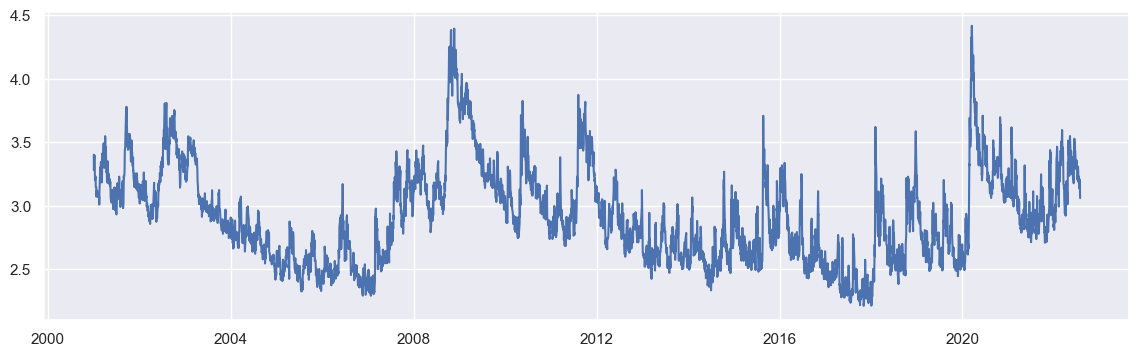

In [6]:
plt.figure(figsize=(14,4))
plt.plot(df['Date'],df['log_vix'])
plt.show() 

In [2]:
import torch 

In [3]:
torch.cuda.is_available()

True

In [4]:

x = torch.rand(5, 3)
print(x)

tensor([[0.1577, 0.7396, 0.7427],
        [0.5404, 0.7423, 0.7852],
        [0.8678, 0.1836, 0.7120],
        [0.7990, 0.9544, 0.5225],
        [0.2928, 0.6321, 0.9031]])


In [5]:
x = torch.randn(2, 3)
x = x.cuda()

In [6]:
x.device.index 

0

In [7]:
x.is_cuda

True

In [11]:
x.cuda().si_cuda

DeferredCudaCallError: CUDA call failed lazily at initialization with error: module 'torch' has no attribute 'version'

CUDA call was originally invoked at:

['  File "d:\\Anaconda3\\envs\\pytorch\\lib\\runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\runpy.py", line 85, in _run_code\n    exec(code, run_globals)\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\ipykernel_launcher.py", line 17, in <module>\n    app.launch_new_instance()\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\traitlets\\config\\application.py", line 976, in launch_instance\n    app.start()\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\ipykernel\\kernelapp.py", line 712, in start\n    self.io_loop.start()\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\tornado\\platform\\asyncio.py", line 199, in start\n    self.asyncio_loop.run_forever()\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\asyncio\\base_events.py", line 541, in run_forever\n    self._run_once()\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\asyncio\\base_events.py", line 1786, in _run_once\n    handle._run()\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\asyncio\\events.py", line 88, in _run\n    self._context.run(self._callback, *self._args)\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\ipykernel\\kernelbase.py", line 510, in dispatch_queue\n    await self.process_one()\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\ipykernel\\kernelbase.py", line 499, in process_one\n    await dispatch(*args)\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\ipykernel\\kernelbase.py", line 406, in dispatch_shell\n    await result\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\ipykernel\\kernelbase.py", line 730, in execute_request\n    reply_content = await reply_content\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\ipykernel\\ipkernel.py", line 387, in do_execute\n    cell_id=cell_id,\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\ipykernel\\zmqshell.py", line 528, in run_cell\n    return super().run_cell(*args, **kwargs)\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\IPython\\core\\interactiveshell.py", line 2975, in run_cell\n    raw_cell, store_history, silent, shell_futures, cell_id\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\IPython\\core\\interactiveshell.py", line 3029, in _run_cell\n    return runner(coro)\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\IPython\\core\\async_helpers.py", line 78, in _pseudo_sync_runner\n    coro.send(None)\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\IPython\\core\\interactiveshell.py", line 3257, in run_cell_async\n    interactivity=interactivity, compiler=compiler, result=result)\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\IPython\\core\\interactiveshell.py", line 3472, in run_ast_nodes\n    if (await self.run_code(code, result,  async_=asy)):\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\IPython\\core\\interactiveshell.py", line 3552, in run_code\n    exec(code_obj, self.user_global_ns, self.user_ns)\n', '  File "C:\\Users\\gaolzhu\\AppData\\Local\\Temp\\ipykernel_4420\\1926665220.py", line 1, in <module>\n    import torch\n', '  File "<frozen importlib._bootstrap>", line 983, in _find_and_load\n', '  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked\n', '  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked\n', '  File "<frozen importlib._bootstrap_external>", line 728, in exec_module\n', '  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\torch\\__init__.py", line 537, in <module>\n    _C._initExtension(manager_path())\n', '  File "<frozen importlib._bootstrap>", line 983, in _find_and_load\n', '  File "<frozen importlib._bootstrap>", line 967, in _find_and_load_unlocked\n', '  File "<frozen importlib._bootstrap>", line 677, in _load_unlocked\n', '  File "<frozen importlib._bootstrap_external>", line 728, in exec_module\n', '  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\torch\\cuda\\__init__.py", line 123, in <module>\n    _lazy_call(_check_capability)\n', '  File "d:\\Anaconda3\\envs\\pytorch\\lib\\site-packages\\torch\\cuda\\__init__.py", line 121, in _lazy_call\n    _queued_calls.append((callable, traceback.format_stack()))\n']

In [12]:
torch.__version__

'1.8.2'

In [13]:
torch.cuda.is_available()

True